In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from scipy.stats.mstats import winsorize
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.compose import make_column_transformer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error


# Assignment 2 - Regression
### Predict the TOTAL COMPENSATION for this year. 

The data file provided is a salary survey for tech workers in Europe. We want to predict the total amount of compensation they bring in each year, based off of the details of their work. 

Some notes that will be important:
<ul>
    <li>The total compensation will need to be constructed, there is a column for salary, "Yearly brutto salary (without bonus and stocks) in EUR", as well as a column for bonus compensation, "Yearly bonus + stocks in EUR". 
    <li>Some categorical variables will need some work, and there isn't generally an exact answer. The main concern is things with categories that have a bunch of values with a very small count. For example, if there is only 1 person in City X, then that value likely needs to be addressed. We don't want it encoded into a new column of one 1 and thousands of 0s. 
    <li>There is an article exploring some of the data here: https://www.asdcode.de/2021/01/it-salary-survey-december-2020.html
    <li>Imputation and a bit of data manipulation will be required. 
    <li>Use any regression method you'd like. Some ones are closely related to what we've done, you may want to look at them, e.g. ExtraTreesRegressor. 
    <li>Initial accurracy, and potentially final accuracy, may not be great. When I made a plain model will little optimization the errors were large and the R2 was low. There is lots of room for optimization. 
    <li>Research challenge - try some work on the target, look into TransformedTargetRegressor and see if that helps. Recall in stats when we had skewed distributions... Maybe it helps, maybe it doesn't. 
    <li>EDA and data prep are up to you - you'll probably need to do a little exploring to figure out what cleanup is needed. When I did it, I did things kind of iteratively when I did it. For example, look at the value counts, figure out how to treat the different categories, clean something up, look at the results, potentially repeat if needed. After you figure out what needs to be done, you may be able to take some of those steps and incorporate them into a pipeline to be cleaner....
    <li><b>CRITICAL - Please make sure your code runs with RUN ALL. It should load the data that you're given, do all the processing, and spit out results. Comment out or remove anything that you've cleaned up and don't need - e.g. if you scaled a value manually, then moved that into a pipeline, don't leave the original scaling code active when the file is run.</b>
</ul>

### Details and Deliverables

You'll need to build code to produce the predictions. In particular, there's a few things that'll be marked:
<ul>
    <li>Please add a markdown cell at the bottom, and put in a few notes addressing the following:
    <ul>
        <li> Accuracy of your models with/without feature selection. Include both train/test for each. Please use R2 and RMSE. 
        <li> Feature Selection - Please identify what you did for feature selection. No need for a long explaination, something along the lines of "I did X, and the result was that 4 features were removed". Try at least 2 things. 
        <li> Hyperparameter Changes / Grid Search Improvements. What did you try, and why. Similar explaination to above, short. 
        <li> Overall this section should be roughly as long as this intro block - just outline what the results were, what you did to improve, and the results after. 
        <li> If you could use titles/bullet points I'd really appreciate it. 
    </ul>
    <li>Grade Breakdown:
    <ul>
        <li> Code is readable, there are comments: 20%
        <li> Explaination as defined above: 60% (20% each point)
        <li> Accuracy: 20% As compared to everyone else. This will be generously graded, I won't be surprised if overall accuracy is low for most people. 
    </ul>
</ul>

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
#Load Data
# df = pd.read_csv("/content/drive/MyDrive/school/Euro_Salary.csv")
df = pd.read_csv("Euro_Salary.csv")
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1253,1248,24/11/2020 13:55:19,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1226.0,NaN,NaN,NaN,32.509788,5.663804,20.0,29.0,32.0,35.0,69.0
Gender,1243,3,Male,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1253,119,Berlin,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,1247,148,Software Engineer,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total years of experience,1237,48,10,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of experience in Germany,1221,53,2,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seniority level,1241,24,Senior,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Your main technology / programming language,1126,256,Java,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other technologies/programming languages you use often,1096,562,Javascript / Typescript,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.sample(10)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
1147,11/12/2020 22:00:36,34.0,Female,Berlin,Designer (UI/UX),10,6,Senior,"PS, Sketch, React, CSS3",Javascript / Typescript,45000.00,NaN,30,Full-time employee,Unlimited contract,German,up to 10,Product
844,27/11/2020 13:41:01,28.0,Male,Frankfurt,Mobile Developer,5,1,Senior,Swift,Swift,50000.00,0,24,Full-time employee,Unlimited contract,English,11-50,Consulting / Agency
982,30/11/2020 18:25:04,22.0,Male,Istanbul,Backend Developer,3,0,Middle,PHP,"Python, Javascript / Typescript, SQL, AWS, Docker",10001.00,0,0,Self-employed (freelancer),Unlimited contract,English,up to 10,Startup
432,24/11/2020 21:05:56,27.0,Male,Berlin,Tech Lead / Full-Stack,5,3.5,Lead,Python / JavaScript (React),"Python, Javascript / Typescript, SQL, AWS, Doc...",90000.00,1000,30 in contract (but theoretically unlimited),Full-time employee,Unlimited contract,English,11-50,Startup
258,24/11/2020 14:30:08,33.0,Male,Berlin,iOS Developer,10,2,Middle,Swift,"Ruby, Objective C",67000.00,NaN,29,Full-time employee,Unlimited contract,English,1000+,Product
547,25/11/2020 11:42:08,27.0,Male,Berlin,DevOps,7,3.5,Senior,Go,"Python, PHP, AWS, Google Cloud, Kubernetes, Do...",80000.00,NaN,26,Full-time employee,Unlimited contract,English,101-1000,Startup
753,26/11/2020 10:31:07,39.0,Male,Cologne,Teamlead,12,12,Head,PHP,"AWS, Docker",75000.00,75000,30,Full-time employee,Unlimited contract,German,up to 10,Startup
894,28/11/2020 20:21:28,39.0,Male,Düsseldorf,Technical project manager,12,4,Senior,PHP,SQL,65000.00,6000,30,Full-time employee,Unlimited contract,German,1000+,Consulting / Agency
235,24/11/2020 13:55:19,32.0,Male,Berlin,Engineering Manager,9,5,Lead,NaN,"PHP, Javascript / Typescript, .NET, SQL, Googl...",95000.00,140000,365,Full-time employee,Unlimited contract,English,1000+,Product
973,30/11/2020 16:01:37,23.0,Male,"NJ, USA","Student, Software Developer, Data Engineer",4,0,Entry level,"Django, Flask, Plotly Dash","Python, AWS",54179.13,60847.32,NaN,"Full-time position, part-time position, & self...",Unlimited contract,English,up to 10,"Full-time position in Education, part-time pos..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 18 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Timestamp                                               1253 non-null   object 
 1   Age                                                     1226 non-null   float64
 2   Gender                                                  1243 non-null   object 
 3   City                                                    1253 non-null   object 
 4   Position                                                1247 non-null   object 
 5   Total years of experience                               1237 non-null   object 
 6   Years of experience in Germany                          1221 non-null   object 
 7   Seniority level                                         1241 non-null   object 
 8   Your main technology / programming lan

In [11]:
#df.info()
df["Other technologies/programming languages you use often"].value_counts()

Javascript / Typescript                                                                   44
Python                                                                                    37
SQL                                                                                       31
AWS, Docker                                                                               16
Kotlin                                                                                    15
                                                                                          ..
Python, Ruby, Java / Scala, Go, Rust, AWS, Kubernetes, Docker, Terraform, helm, packer     1
Kotlin, SQL, AWS, Kubernetes, Docker                                                       1
Python, R, Go                                                                              1
C/C++, PHP, SQL                                                                            1
Python, AWS, Kubernetes, Docker, terraform, ansible                   

In [12]:
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,30,Full-time employee,Unlimited contract,English,51-100,Product
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product


# Answers and Explainations
(Expand/modify as needed)

### Results

### Feature Selection Activities

### Hyperparameter Changes

In [13]:
# Check for missing values
print(df.isnull().sum())

Timestamp                                                   0
Age                                                        27
Gender                                                     10
City                                                        0
Position                                                    6
Total years of experience                                  16
Years of experience in Germany                             32
Seniority level                                            12
Your main technology / programming language               127
Other technologies/programming languages you use often    157
Yearly brutto salary (without bonus and stocks) in EUR      0
Yearly bonus + stocks in EUR                              424
Number of vacation days                                    68
Employment status                                          17
Сontract duration                                          29
Main language at work                                      16
Company 

In [14]:
# Remove duplicates
df = df.drop_duplicates()

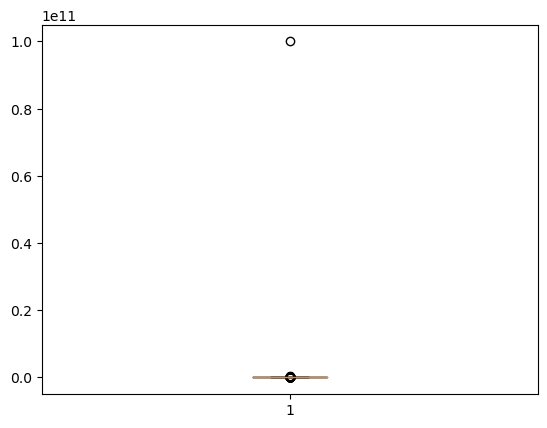

In [15]:
# Check for outliers
plt.boxplot(df['Yearly brutto salary (without bonus and stocks) in EUR'])
plt.show()

In [16]:
# Filter out the outlier
# I used to winsorization to determine the 99% in Yearly brutto salary (without bonus and stocks) in EUR

df = df[df['Yearly brutto salary (without bonus and stocks) in EUR'] < 187000]

In [17]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1243,1238,24/11/2020 13:55:19,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1217.0,NaN,NaN,NaN,32.499589,5.642608,21.0,29.0,32.0,35.0,69.0
Gender,1234,3,Male,1041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1243,118,Berlin,675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,1238,147,Software Engineer,385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total years of experience,1228,48,10,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of experience in Germany,1212,53,2,194,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seniority level,1232,22,Senior,563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Your main technology / programming language,1117,252,Java,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other technologies/programming languages you use often,1089,559,Javascript / Typescript,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# clean up years of experience
df["Years of experience in Germany"].value_counts()

2                                                      194
1                                                      187
3                                                      155
5                                                      141
4                                                      121
0                                                       98
6                                                       69
7                                                       36
10                                                      29
1.5                                                     24
9                                                       20
8                                                       17
0.5                                                     13
12                                                      12
2.5                                                     10
3.5                                                      9
15                                                      

In [19]:
df['Years of experience in Germany'] = df['Years of experience in Germany'].str.replace(',', '.')
df['Years of experience in Germany'] = df['Years of experience in Germany'].replace('<1', '0.5')
df['Years of experience in Germany'] = df['Years of experience in Germany'].replace('3 (in Poland)', '3')
df['Years of experience in Germany'] = pd.to_numeric(df['Years of experience in Germany'], errors='coerce')

In [20]:
# clean up years of experience
df["Total years of experience"].value_counts()

10                                                     137
5                                                      135
6                                                       98
8                                                       92
7                                                       84
4                                                       80
12                                                      67
3                                                       66
15                                                      63
9                                                       60
2                                                       57
11                                                      43
13                                                      41
14                                                      39
1                                                       29
20                                                      25
16                                                      

In [21]:
# clean up Total years of experience
# replace any non-numeric or missing values with NaN
df["Total years of experience"] = pd.to_numeric(df["Total years of experience"], errors="coerce")

# fill in NaN values with the median of the column
median = np.nanmedian(df["Total years of experience"])
df["Total years of experience"].fillna(median, inplace=True)

# convert the column to integer data type
df["Total years of experience"] = df["Total years of experience"].astype(int)

In [22]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 1252
Data columns (total 18 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Timestamp                                               1243 non-null   object 
 1   Age                                                     1217 non-null   float64
 2   Gender                                                  1234 non-null   object 
 3   City                                                    1243 non-null   object 
 4   Position                                                1238 non-null   object 
 5   Total years of experience                               1243 non-null   int32  
 6   Years of experience in Germany                          1204 non-null   float64
 7   Seniority level                                         1232 non-null   object 
 8   Your main technology / programming lan

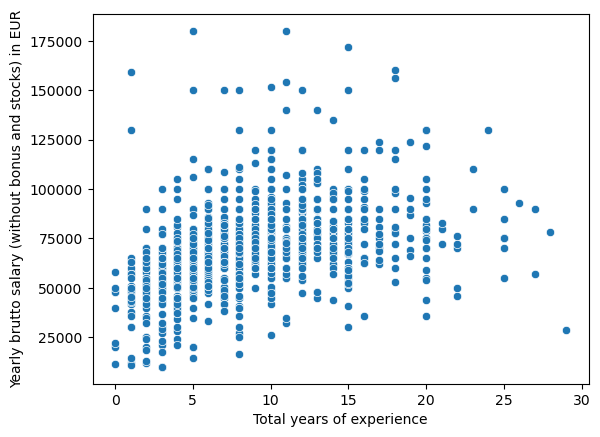

In [23]:
# Normalize numerical df
df['Total years of experience'] = df['Total years of experience'].astype(float)
# df['Total years of experience'] = (df['Total years of experience'] - df['Total years of experience'].mean()) / df['Total years of experience'].std()

# Filter out the outlier

df = df[df['Total years of experience'] <30]


# Visualize the df
sns.scatterplot(x='Total years of experience', y='Yearly brutto salary (without bonus and stocks) in EUR', data=df)
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 0 to 1252
Data columns (total 18 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Timestamp                                               1236 non-null   object 
 1   Age                                                     1210 non-null   float64
 2   Gender                                                  1227 non-null   object 
 3   City                                                    1236 non-null   object 
 4   Position                                                1231 non-null   object 
 5   Total years of experience                               1236 non-null   float64
 6   Years of experience in Germany                          1197 non-null   float64
 7   Seniority level                                         1225 non-null   object 
 8   Your main technology / programming lan

In [25]:
# remove all leading/trailing spaces using the str.strip() 
df.columns = df.columns.str.strip()

In [26]:
print(df['Position'].value_counts())

Software Engineer            382
Backend Developer            172
Data Scientist               109
Frontend Developer            88
QA Engineer                   71
                            ... 
Testautomation                 1
Recruiter                      1
DBA                            1
DB developer/Data analyst      1
IT Operations Manager          1
Name: Position, Length: 145, dtype: int64


In [27]:
# Drop rows with missing values in the target variable
# df = df.dropna(subset=['Yearly brutto salary (without bonus and stocks) in EUR'])

# Impute missing values in other columns with median value
##df = df.fillna(df.median())

# One-hot encode categorical variables
# df = pd.get_dummies(df, columns=['City', 'Gender','Position','Seniority level',
                                # 'Your main technology / programming language', 'Main language at work', 
                                 #'Company size', 'Company type'], dummy_na=True)

In [28]:
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,30,Full-time employee,Unlimited contract,English,51-100,Product
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7.0,4.0,Senior,Ruby,NaN,80000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4.0,1.0,Junior,Javascript,NaN,54000.0,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product


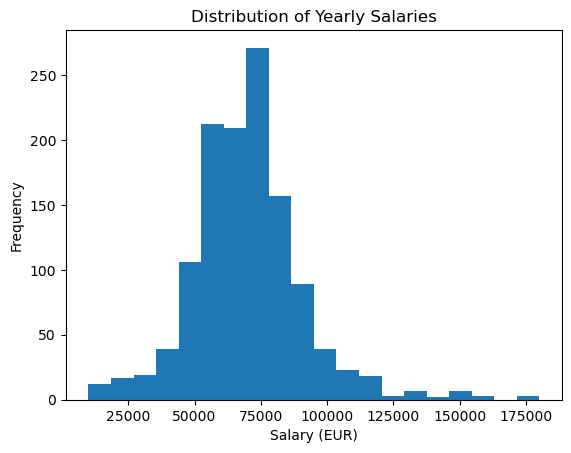

In [29]:
# Distribution of Yearly Salaries withouththe bonus and stocks

# Remove rows with missing salary data
df = df.dropna(subset=['Yearly brutto salary (without bonus and stocks) in EUR'])

# Create a histogram
plt.hist(df['Yearly brutto salary (without bonus and stocks) in EUR'], bins=20)
plt.title('Distribution of Yearly Salaries')
plt.xlabel('Salary (EUR)')
plt.ylabel('Frequency')
plt.show()

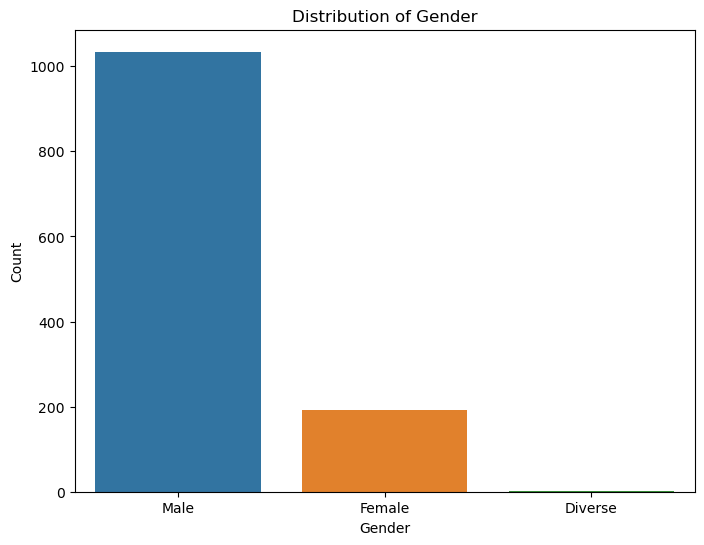

In [30]:
# Distribution of Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

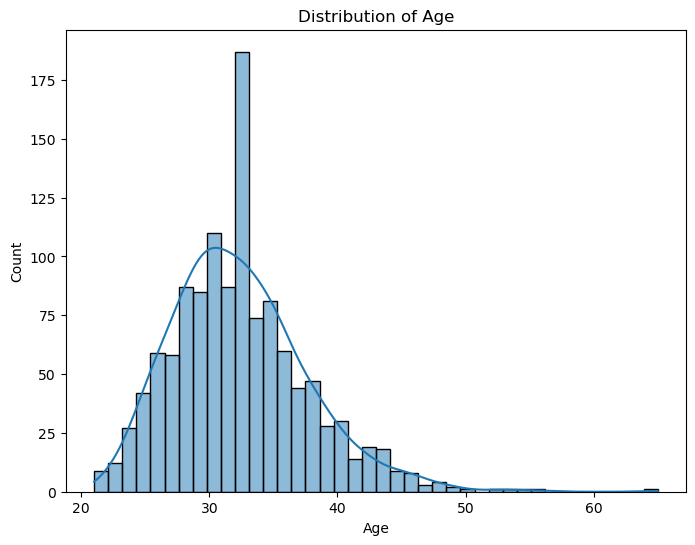

In [31]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

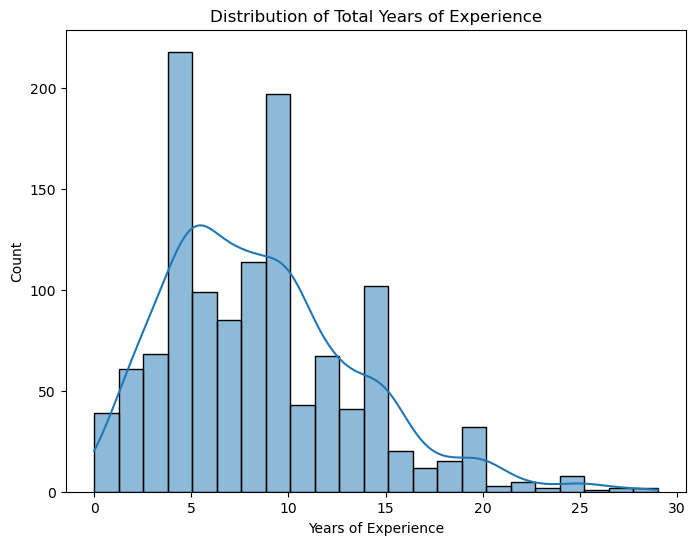

In [32]:
# Distribution of Total Years of Experience
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Total years of experience', kde=True)
plt.title('Distribution of Total Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.show()

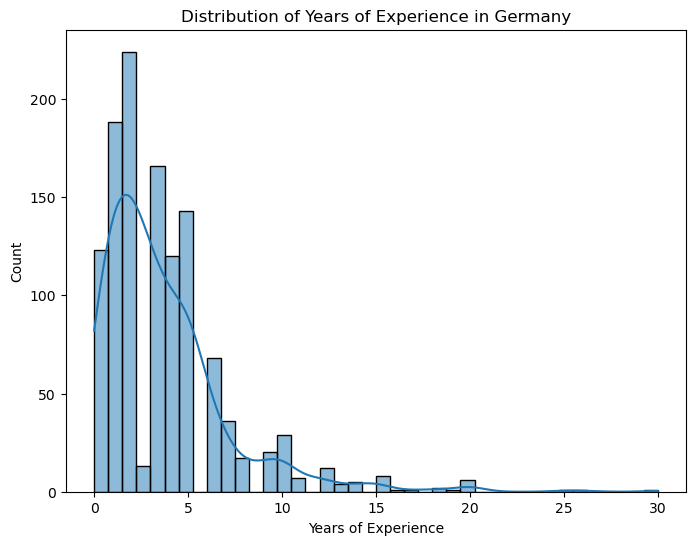

In [33]:
# Distribution of Years of Experience in Germany
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Years of experience in Germany', kde=True)
plt.title('Distribution of Years of Experience in Germany')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.show()

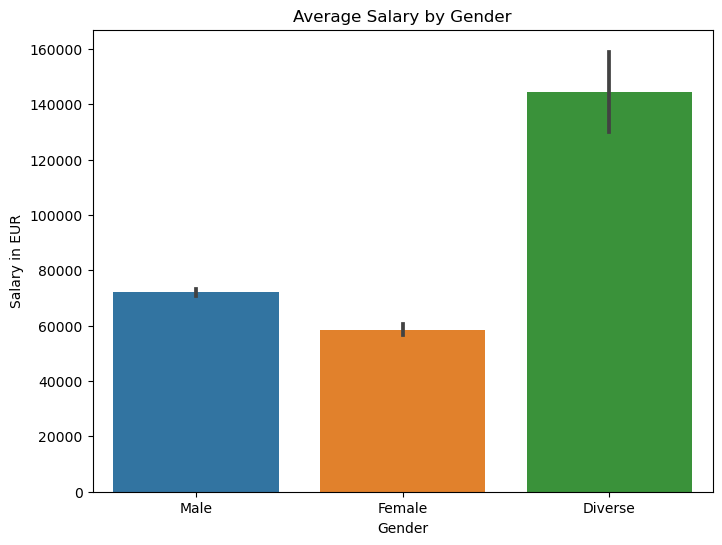

In [34]:
# Average Salary by Gender
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Gender', y='Yearly brutto salary (without bonus and stocks) in EUR', estimator=np.mean)
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary in EUR')
plt.show()

In [35]:
# Calculate average salary by position. I will try to adjust the colum by listing out the values

positions = df['Position'].unique()
print(positions)

['Software Engineer' 'Backend Developer' 'Frontend Developer' 'DevOps'
 'Data Engineer' 'Designer (UI/UX)' 'Product Manager' 'Mobile Developer'
 'Software Architect' 'Team Lead' 'Test manager' 'QA Engineer'
 'Data Scientist' 'Hardware Engineer' 'Engineering Manager'
 'Analytics engineer' 'Localization producer' 'Reporting Engineer'
 'Account Managet' 'agile master ' 'ML Engineer' 'Solution Architect'
 'BI Consultant' 'Fullstack Developer' nan 'Cloud Architect'
 'System Administrator' 'Project Manager' 'Network Engineer '
 'VP Engineering' 'Agile Coach' 'Data Science Manager' 'Scrum Master'
 'Firmware Engineer' 'Solutions Architect' 'Data Center Manager'
 'C/C++/Java developer' 'DevOps Manager' 'Tech Lead'
 'Network Administrator' 'Security Manager' 'Consultant Data Analytics'
 'BI IT Consultant' 'Graphic Designer' 'iOS Developer' 'Banker'
 'Cloud Engineer' 'Solutions architect' 'Stuttgart'
 'Senior Program Manager' 'DB developer/Data analyst' 'Security Engineer'
 'Business Analyst' 'DB

In [36]:
df['Position'] = df['Position'].replace({
    'Backend Developer': 'Fullstack Developer', 
    'Frontend Developer': 'Fullstack Developer',
    'Data Engineer': 'Data Professional',
    'Data scientist': 'Data Professional',
    'IT Spezialist': 'IT Specialist',
    'Systemadministrator': 'System Administrator',
    'SW Architect': 'Software Architect',
    'Dana Analyst': 'Data Analyst',
    'Teamlead': 'Team Lead',
    'Lead Software Developer': 'Lead Developer',
    'Engineering Manager': 'Engineering Manager/Director',
    'CTO': 'Executive',
    'XR Developer': 'Software Developer',
    'Computational linguist': 'Linguist',
    'Full-Stack Developer': 'Fullstack Developer',
    'QA Manager': 'QA Lead/Manager',
    'QA Lead': 'QA Lead/Manager',
    'Robotics Engineer': 'Robotics Professional',
    'DatabEngineer': 'Data Professional',
    'Application Consultant': 'Consultant',
    'Team Lead': 'Team Lead/Manager',
    'Lead Developer': 'Lead Developer/Manager',
    'Testmanager': 'Test Manager',
    'Researcher/ Consumer Insights Analyst': 'Researcher/Analyst',
    'Beikoch': 'Other',
    'Product Management Praktikant': 'Intern',
    'It Consulting': 'Consultant',
    'technical business analyst': 'Business Analyst',
    'Marketing Analyst': 'Marketing Professional',
    'Product Analyst': 'Product Professional',
    'Researcher': 'Researcher/Analyst',
    'support engineer': 'Support Professional',
    'Security engineer': 'Security Professional',
    'Big Data Engineer': 'Data Professional',
    'Technical project manager': 'Project Manager',
    'BI Analyst ': 'BI Professional',
    'BI Developer / Data Engineer': 'BI Professional',
    'technical account manager ': 'Account Manager',
    'Software Developer in Test': 'Test Professional',
    'Presales Engineer ': 'Sales Professional',
    'Business Development Manager Operations ': 'Business Development Professional',
    'QA Manager ': 'QA Lead/Manager',
    'SAP BW Senior Consultant ': 'SAP Consultant',
    'Software tester ': 'Test Professional',
    'ML Engineer': 'AI/ML Engineer',
    'Fullstack engineer, ну или Software engineer': 'Fullstack Developer',
    'BI Consultant SAP/ Data Engineer': 'BI Professional',
    'computer vision researcher': 'Researcher/Analyst',
    'Data analyst ': 'Data Analyst',
    'working student (QA)': 'Intern',
    'Mobile Developer': 'Software Developer',
    'Senior Network&Security Eng.': 'Network/Security Professional',
    'Localization producer': 'Localization Professional',
    'BI IT Consultant': 'BI Consultant',
    'iOS Developer': 'Software Developer',
    'Cloud Engineer': 'Cloud Professional',
    'DB developer/Data analyst': 'Data Analyst',
    'DBA': 'Database Administrator',
    'Consultant Data Analytics': 'Consultant',
    'Graphic Designer': 'Designer',
    'System Administrator': 'System Administrator',
    'Recruiter': 'HR Professional',
    'Testautomation': 'Test Professional',
    'SAP Developer': 'SAP Consultant','HiWi': 'Other'})


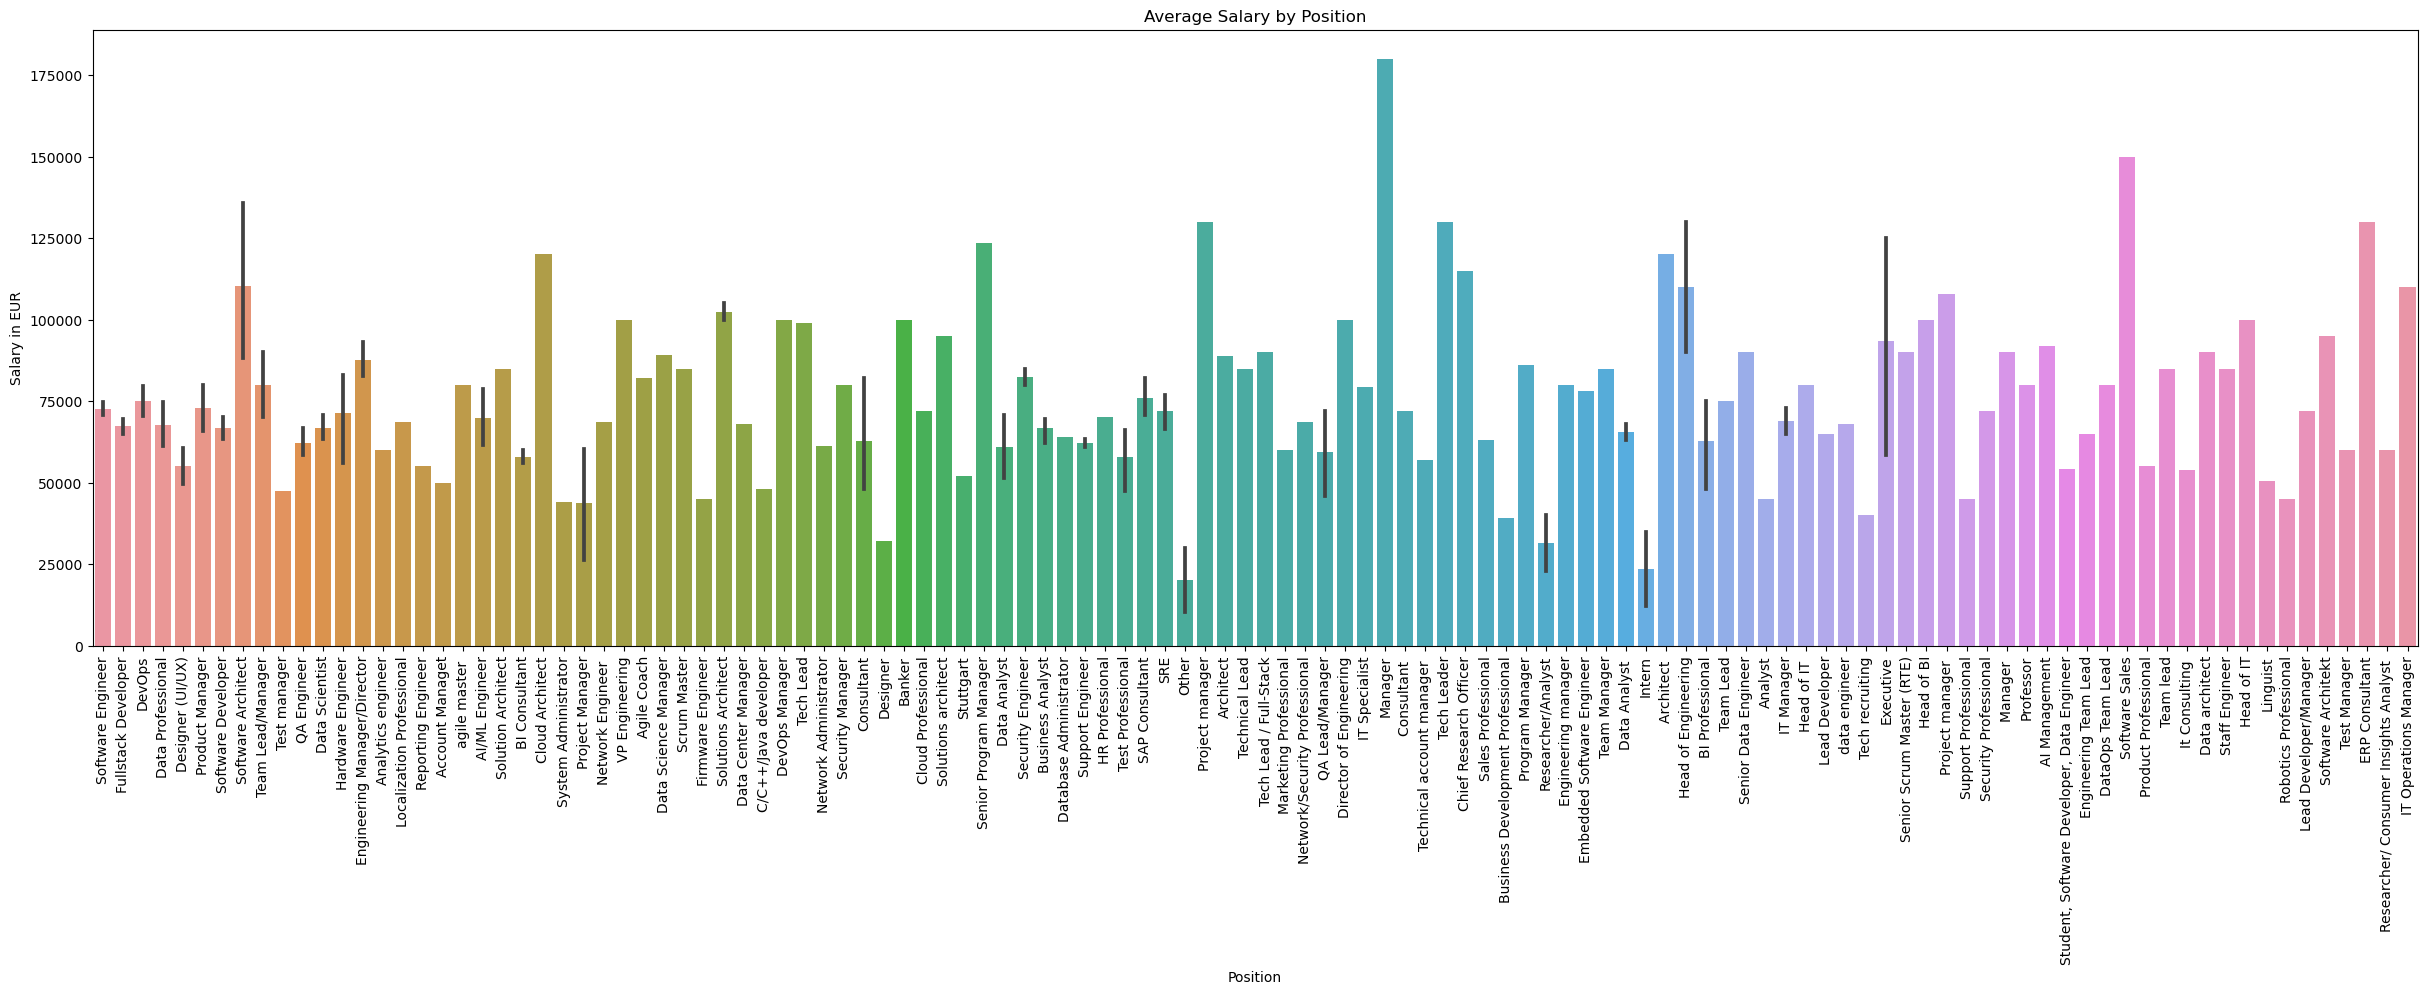

In [37]:
# Calculate average salary by position
avg_salary_by_position = df.groupby('Position')['Yearly brutto salary (without bonus and stocks) in EUR'].mean().reset_index()

# Sort positions by average salary
avg_salary_by_position = avg_salary_by_position.sort_values('Yearly brutto salary (without bonus and stocks) in EUR', ascending=False)

plt.figure(figsize=(30,8))
ax = sns.barplot(data=df, x='Position', y='Yearly brutto salary (without bonus and stocks) in EUR')
plt.title('Average Salary by Position')
plt.xlabel('Position')
plt.ylabel('Salary in EUR')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()


In [38]:
def replace_low_freq(d, col, threshold=10, replacement='other'):
    value_counts = d[col].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    tmp = d[col].replace(to_replace=to_remove, value=replacement)
    return tmp

In [39]:
df['Position'].value_counts()

Software Engineer         382
Fullstack Developer       266
Data Scientist            109
QA Engineer                71
DevOps                     57
                         ... 
Database Administrator      1
Senior Program Manager      1
Stuttgart                   1
Solutions architect         1
IT Operations Manager       1
Name: Position, Length: 116, dtype: int64

In [40]:
df['Position'] = replace_low_freq(df, 'Position', threshold=5, replacement='Other')
df["Position"].value_counts()

Software Engineer               382
Fullstack Developer             266
Other                           149
Data Scientist                  109
QA Engineer                      71
DevOps                           57
Software Developer               54
AI/ML Engineer                   41
Product Manager                  39
Data Professional                26
Designer (UI/UX)                 16
Data Analyst                     11
Engineering Manager/Director     10
Name: Position, dtype: int64

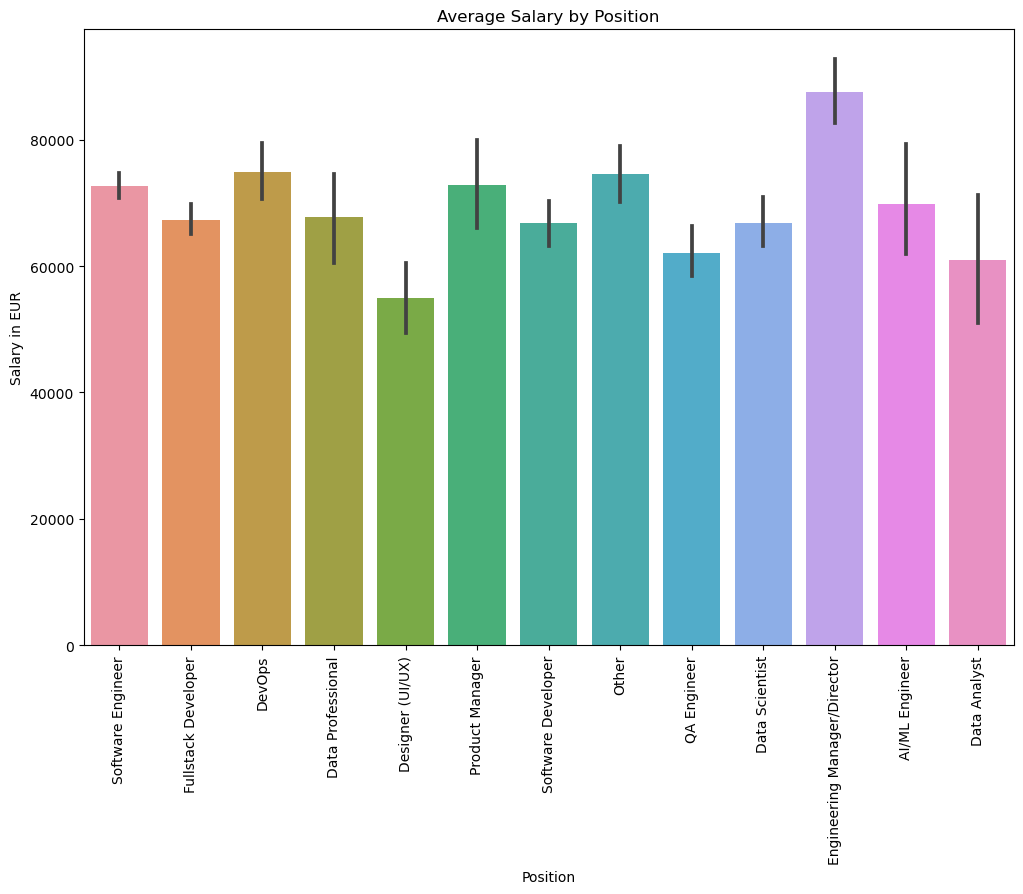

In [41]:
# Calculate average salary by position
avg_salary_by_position = df.groupby('Position')['Yearly brutto salary (without bonus and stocks) in EUR'].mean().reset_index()

# Sort positions by average salary
avg_salary_by_position = avg_salary_by_position.sort_values('Yearly brutto salary (without bonus and stocks) in EUR', ascending=False)

plt.figure(figsize=(12,8))
ax = sns.barplot(data=df, x='Position', y='Yearly brutto salary (without bonus and stocks) in EUR')
plt.title('Average Salary by Position')
plt.xlabel('Position')
plt.ylabel('Salary in EUR')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [42]:
df['Your main technology / programming language'].value_counts()

Java                 182
Python               164
PHP                   55
C++                   37
JavaScript            34
                    ... 
Go, PHP, SQL           1
Kotlin                 1
Jira                   1
Qml                    1
consumer analysis      1
Name: Your main technology / programming language, Length: 249, dtype: int64

In [43]:
df['Your main technology / programming language'] = replace_low_freq(df, 'Your main technology / programming language', threshold=10, replacement='Other')
df["Your main technology / programming language"].value_counts()

Other         368
Java          182
Python        164
PHP            55
C++            37
JavaScript     34
Javascript     31
C#             29
python         26
Scala          24
Go             23
Swift          23
Kotlin         22
Python         21
Ruby           19
TypeScript     14
SQL            14
.NET           13
JS             12
Name: Your main technology / programming language, dtype: int64

In [44]:
df["Your main technology / programming language"].replace({"Javascript": "JavaScript", "Python ":"Python"}, inplace=True)
df["Your main technology / programming language"].value_counts()

Other         368
Python        185
Java          182
JavaScript     65
PHP            55
C++            37
C#             29
python         26
Scala          24
Go             23
Swift          23
Kotlin         22
Ruby           19
TypeScript     14
SQL            14
.NET           13
JS             12
Name: Your main technology / programming language, dtype: int64

[Text(0, 0, 'TypeScript'),
 Text(1, 0, 'Ruby'),
 Text(2, 0, 'Other'),
 Text(3, 0, 'JavaScript'),
 Text(4, 0, 'PHP'),
 Text(5, 0, 'Java'),
 Text(6, 0, 'C++'),
 Text(7, 0, 'Kotlin'),
 Text(8, 0, 'SQL'),
 Text(9, 0, 'Go'),
 Text(10, 0, 'Python'),
 Text(11, 0, '.NET'),
 Text(12, 0, 'C#'),
 Text(13, 0, 'Scala'),
 Text(14, 0, 'python'),
 Text(15, 0, 'Swift'),
 Text(16, 0, 'JS')]

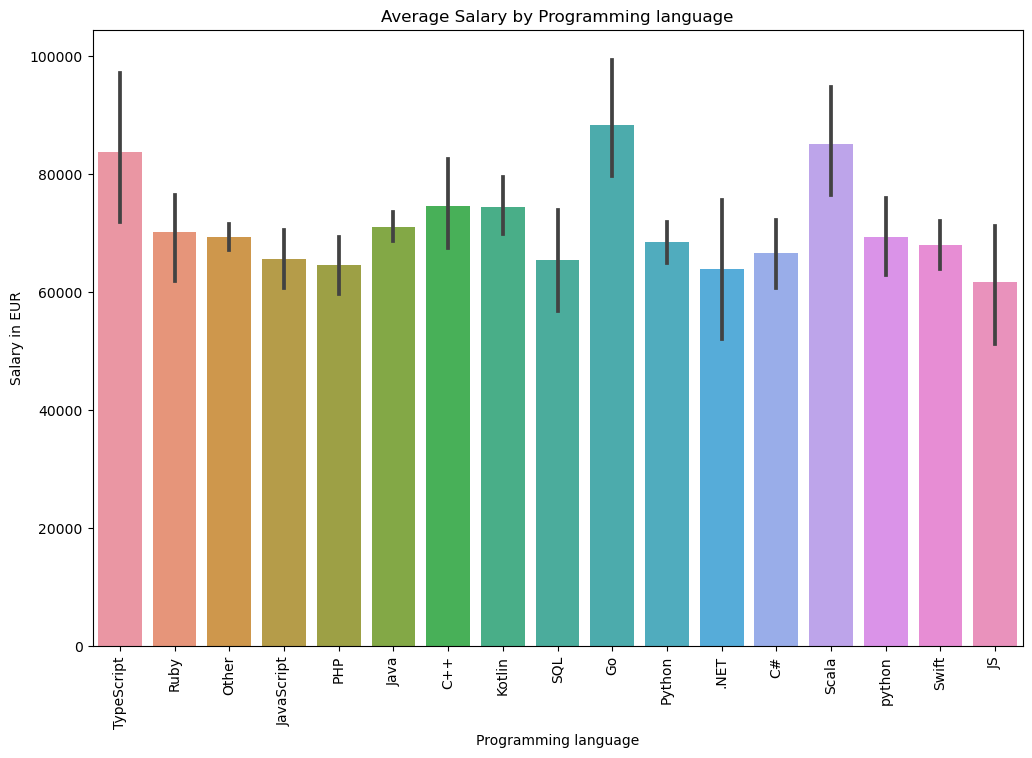

In [45]:
# Calculate average salary by main technology / programming language
avg_salary_by_position = df.groupby('Your main technology / programming language')['Yearly brutto salary (without bonus and stocks) in EUR'].mean().reset_index()

# Sort positions by average salary
avg_salary_by_position = avg_salary_by_position.sort_values('Yearly brutto salary (without bonus and stocks) in EUR', ascending=False)

plt.figure(figsize=(12,8))
ax = sns.barplot(data=df, x='Your main technology / programming language', y='Yearly brutto salary (without bonus and stocks) in EUR')
plt.title('Average Salary by Programming language')
plt.xlabel('Programming language')
plt.ylabel('Salary in EUR')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1236 entries, 0 to 1252
Data columns (total 18 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Timestamp                                               1236 non-null   object 
 1   Age                                                     1210 non-null   float64
 2   Gender                                                  1227 non-null   object 
 3   City                                                    1236 non-null   object 
 4   Position                                                1231 non-null   object 
 5   Total years of experience                               1236 non-null   float64
 6   Years of experience in Germany                          1197 non-null   float64
 7   Seniority level                                         1225 non-null   object 
 8   Your main technology / programming lan

# Construct a Target

In [47]:
# Construct Target by adding salary and bonus. 
df["Bonus"] = pd.to_numeric(df["Yearly bonus + stocks in EUR"], downcast="float", errors="coerce")
df["Bonus"].fillna(0, inplace=True)
df["target"] = df["Yearly brutto salary (without bonus and stocks) in EUR"] + df["Bonus"]
# df.drop(columns={"Timestamp","Yearly brutto salary (without bonus and stocks) in EUR", "Yearly bonus + stocks in EUR", "Bonus"}, inplace=True)
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Bonus,target
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,30,Full-time employee,Unlimited contract,English,51-100,Product,5000.0,85000.0
1,24/11/2020 11:14:16,26.0,Male,Berlin,Fullstack Developer,7.0,4.0,Senior,Ruby,NaN,80000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product,0.0,80000.0
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Other,"Javascript / Typescript, Docker",120000.0,120000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,120000.0,240000.0
3,24/11/2020 11:15:24,28.0,Male,Berlin,Fullstack Developer,4.0,1.0,Junior,JavaScript,NaN,54000.0,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,0.0,54000.0
4,24/11/2020 11:15:46,37.0,Male,Berlin,Fullstack Developer,17.0,6.0,Senior,Other,".NET, SQL, AWS, Docker",62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,0.0,62000.0


In [48]:
# Seems the data is almost cleaned
df['Company type'].value_counts()


Product                753
Startup                248
Consulting / Agency    138
Bank                     5
Media                    3
                      ... 
Publisher                1
Energy                   1
Enterprise               1
service                  1
eCommerce                1
Name: Company type, Length: 62, dtype: int64

In [49]:
df['Company type'] = replace_low_freq(df, 'Company type', threshold=3, replacement='Other')
df["Company type"].value_counts()

Product                753
Startup                248
Consulting / Agency    138
Other                   68
Bank                     5
Name: Company type, dtype: int64

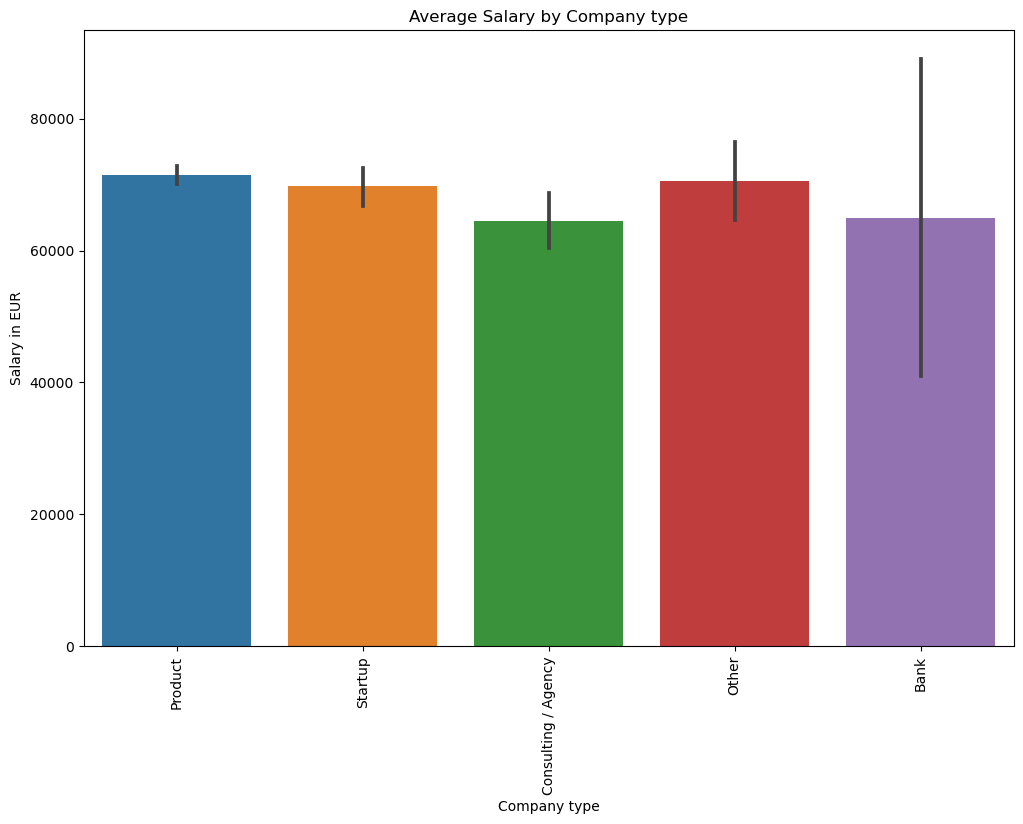

In [50]:
# Calculate average salary by Company Tyoe
avg_salary_by_position = df.groupby('Company type')['Yearly brutto salary (without bonus and stocks) in EUR'].mean().reset_index()

# Sort positions by average salary
avg_salary_by_position = avg_salary_by_position.sort_values('Yearly brutto salary (without bonus and stocks) in EUR', ascending=False)

plt.figure(figsize=(12,8))
ax = sns.barplot(data=df, x='Company type', y='Yearly brutto salary (without bonus and stocks) in EUR')
plt.title('Average Salary by Company type')
plt.xlabel('Company type')
plt.ylabel('Salary in EUR')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [51]:
df['Company size'].value_counts()

1000+       445
101-1000    401
11-50       170
51-100      145
up to 10     58
Name: Company size, dtype: int64

In [52]:
df['Main language at work'].value_counts()

English               1009
German                 181
Russian                 12
Italian                  3
Spanish                  3
English and German       2
Polish                   2
Русский                  2
Czech                    2
50/50                    1
Deuglisch                1
French                   1
both                     1
Russian, English         1
Name: Main language at work, dtype: int64

In [53]:
df['Main language at work'] = replace_low_freq(df, 'Main language at work', threshold=3, replacement='Other')
df["Main language at work"].value_counts()

English    1009
German      181
Other        19
Russian      12
Name: Main language at work, dtype: int64

In [54]:
df['Employment status'].value_counts()

Full-time employee                                                                 1178
Self-employed (freelancer)                                                           25
Part-time employee                                                                    8
Founder                                                                               3
Company Director                                                                      1
working student                                                                       1
Working Student                                                                       1
Full-time position, part-time position, & self-employed (freelancing, tutoring)       1
Intern                                                                                1
full-time, but 32 hours per week (it was my request, I'm a student)                   1
Werkstudent                                                                           1
Name: Employment status, dtype: 

In [55]:
df['Employment status'] = replace_low_freq(df, 'Employment status', threshold=3, replacement='Other')
df["Employment status"].value_counts()

Full-time employee            1178
Self-employed (freelancer)      25
Other                           10
Part-time employee               8
Name: Employment status, dtype: int64

In [56]:
df['Seniority level'].value_counts()

Senior                                       560
Middle                                       365
Lead                                         162
Junior                                        78
Head                                          41
Principal                                      3
Intern                                         1
Entry level                                    1
Working Student                                1
C-Level                                        1
no idea, there are no ranges in the firm       1
Student                                        1
intern                                         1
Key                                            1
C-level executive manager                      1
Director                                       1
No level                                       1
Work Center Manager                            1
Manager                                        1
VP                                             1
No level            

In [57]:
df['Seniority level'] = replace_low_freq(df, 'Seniority level', threshold=3, replacement='Other')
df["Seniority level"].value_counts()

Senior    560
Middle    365
Lead      162
Junior     78
Head       41
Other      19
Name: Seniority level, dtype: int64

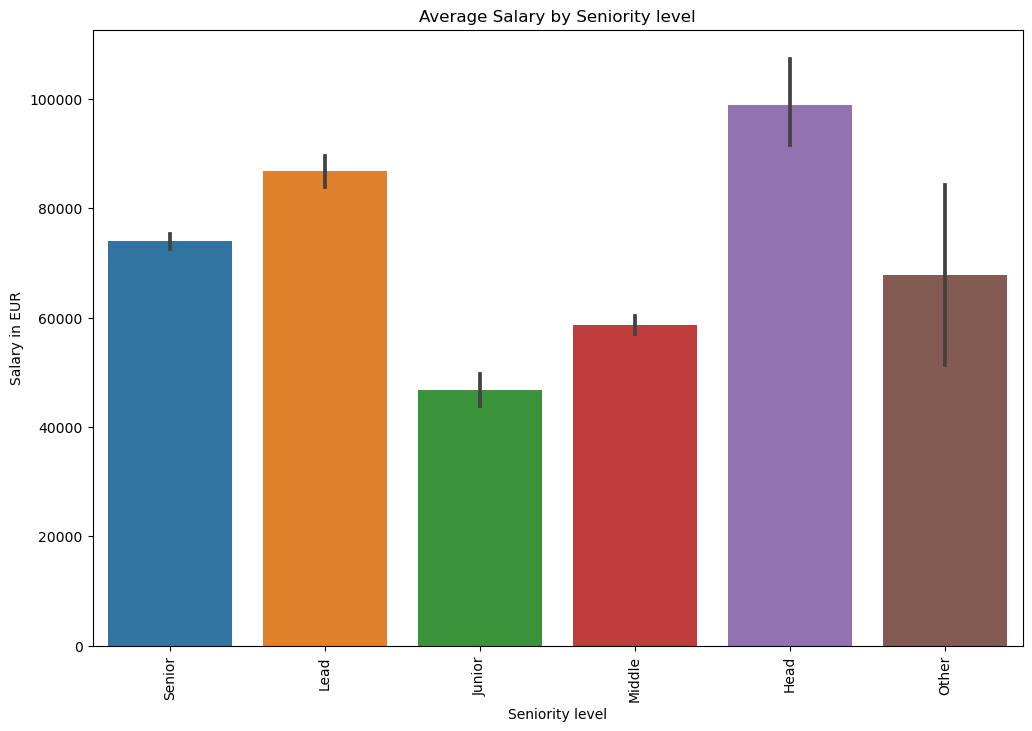

In [58]:
# Calculate average salary by position
avg_salary_by_position = df.groupby('Seniority level')['Yearly brutto salary (without bonus and stocks) in EUR'].mean().reset_index()

# Sort positions by average salary
avg_salary_by_position = avg_salary_by_position.sort_values('Yearly brutto salary (without bonus and stocks) in EUR', ascending=False)

plt.figure(figsize=(12,8))
ax = sns.barplot(data=df, x='Seniority level', y='Yearly brutto salary (without bonus and stocks) in EUR')
plt.title('Average Salary by Seniority level')
plt.xlabel('Seniority level')
plt.ylabel('Salary in EUR')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [59]:
# clean up Number of vacation days
# replace any non-numeric or missing values with NaN
df["Number of vacation days"] = pd.to_numeric(df["Number of vacation days"], errors="coerce")

# Filter out the outlier

df = df[df['Number of vacation days'] <50]


# fill in NaN values with the median of the column
median = np.nanmedian(df["Number of vacation days"])
df["Number of vacation days"].fillna(median, inplace=True)



# convert the column to integer data type
df["Number of vacation days"] = df["Number of vacation days"].astype(int)
# Normalize numerical df
df['Number of vacation days'] = df['Number of vacation days'].astype(float)



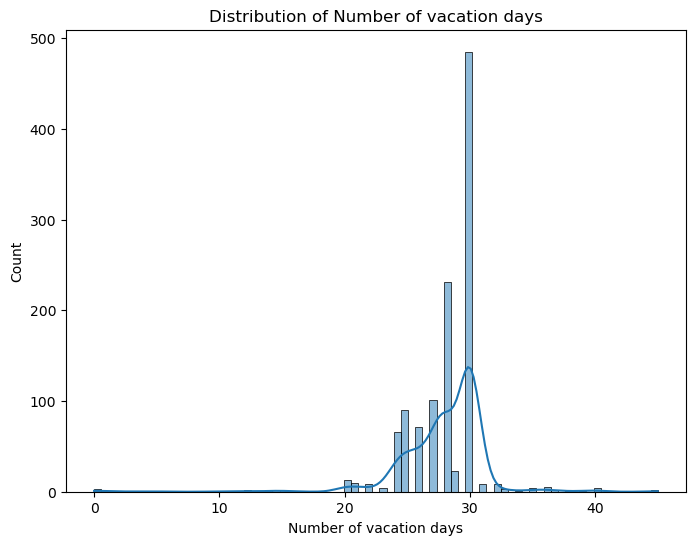

In [60]:
# Distribution of Total Years of Experience
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Number of vacation days', kde=True)
plt.title('Distribution of Number of vacation days')
plt.xlabel('Number of vacation days')
plt.ylabel('Count')
plt.show()

In [61]:

# Drop some columns

df.drop(columns={"Timestamp","Yearly brutto salary (without bonus and stocks) in EUR", "Yearly bonus + stocks in EUR", "Bonus","Other technologies/programming languages you use often"}, inplace=True)

In [62]:
# City
df['City'].value_counts()

Berlin         628
Munich         222
Frankfurt       42
Hamburg         35
Stuttgart       20
              ... 
Nuremberg        1
Lübeck           1
Malta            1
Dresden          1
Saarbrücken      1
Name: City, Length: 111, dtype: int64

In [63]:
df['City'] = replace_low_freq(df, 'City', threshold=10, replacement='Other Cities')
df["City"].value_counts()

Berlin          628
Munich          222
Other Cities    190
Frankfurt        42
Hamburg          35
Stuttgart        20
Cologne          18
Name: City, dtype: int64

In [64]:
df['Сontract duration'].value_counts()

Unlimited contract    1093
Temporary contract      54
Name: Сontract duration, dtype: int64

In [65]:
df.head()

,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,target
0,26.0,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,30.0,Full-time employee,Unlimited contract,English,51-100,Product,85000.0
1,26.0,Male,Berlin,Fullstack Developer,7.0,4.0,Senior,Ruby,28.0,Full-time employee,Unlimited contract,English,101-1000,Product,80000.0
2,29.0,Male,Berlin,Software Engineer,12.0,6.0,Lead,Other,30.0,Self-employed (freelancer),Temporary contract,English,101-1000,Product,240000.0
3,28.0,Male,Berlin,Fullstack Developer,4.0,1.0,Junior,JavaScript,24.0,Full-time employee,Unlimited contract,English,51-100,Startup,54000.0
4,37.0,Male,Berlin,Fullstack Developer,17.0,6.0,Senior,Other,29.0,Full-time employee,Unlimited contract,English,101-1000,Product,62000.0


In [66]:
# one hot endcoding for categorical and string data
# One-hot encode categorical variables
#df = pd.get_dummies(df, columns=['City', 'Gender','Position','Seniority level','Your main technology / programming language', 
                                 #'Employment status','Main language at work','Сontract duration',
                                 #'Company size', 'Company type'], dummy_na=True)

In [67]:
# Check for missing values in the data
print(df.isna().sum())



Age                                             17
Gender                                           5
City                                             0
Position                                         2
Total years of experience                        0
Years of experience in Germany                  30
Seniority level                                  6
Your main technology / programming language    103
Number of vacation days                          0
Employment status                                3
Сontract duration                                8
Main language at work                            5
Company size                                     4
Company type                                    10
target                                           0
dtype: int64


In [68]:
# Replace missing values with the mean value of the column
df.fillna(df.mean(), inplace=True)

C:\Users\toluw\AppData\Local\Temp\ipykernel_19140\1017755748.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [69]:
# data =['Age	Gender',	'City',	'Position',	'Total years of experience',	'Years of experience in Germany',	'Seniority level',	'Your main technology / programming language',
       #'Number of vacation days',' Employment status'	,'Сontract duration',	'Main language at work'	,'Company size',	'Company type']
                               

In [84]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=123)

# Define the categorical and numerical features
categorical_features = ['Gender', 'City', 'Position', 'Seniority level', 'Your main technology / programming language',
                        'Employment status', 'Main language at work', 'Company size', 'Company type','Сontract duration']
numerical_features = ['Age', 'Total years of experience', 'Years of experience in Germany', 'Number of vacation days']


In [85]:

# Create the preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [86]:
# Combine the preprocessing pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_transformer, categorical_features),
    ('num', numerical_transformer, numerical_features)
])

# Create the final pipeline with the preprocessor and the linear regression estimator
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('estimator', LinearRegression())
])


In [87]:
# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
predictions = pipeline.predict(X_test)

# Calculate the R-squared value and RMSE
rsquared = pipeline.score(X_test, y_test)
rmse = mean_squared_error(y_test, predictions, squared=False)

# Print the results
print("R-squared: {:.3f}".format(rsquared))
print("RMSE: {:.3f}".format(rmse))

R-squared: 0.082
RMSE: 38805.089
